# Use Logistics and KNN to classify wine data

1. define biz prob

2. read in dataset

3. eda

4. tts

5. cv on train with both logistic and knn

6. build model

7. eval model

8. recommend

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
data = load_wine()

In [7]:
# data
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
# col names
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
# target
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# target names
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
# create df
df = pd.DataFrame(data.data, columns = data.feature_names)
df['class'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [17]:
# eda
df.info()
# no nulls, all floats/int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
class                           178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


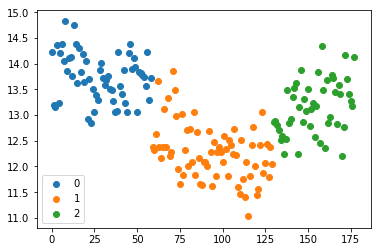

In [23]:
# viz data. by alcohol content
a = df["alcohol"]

for name, group in df.groupby("class"):
    plt.scatter(group.index, a[group.index], label=name)
plt.legend()
plt.show()

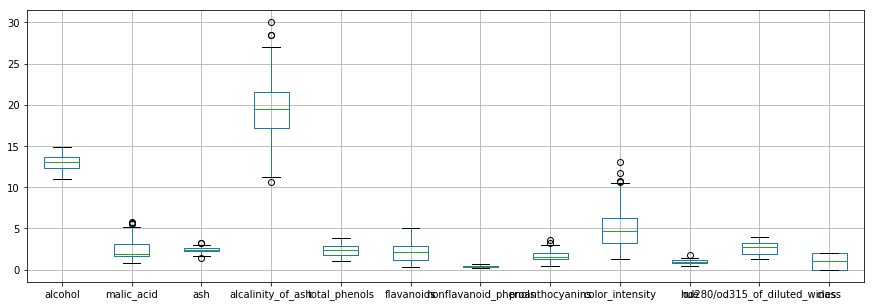

In [102]:
# spot outliers
extra = ['magnesium', 'proline']
df[[k for k in df.columns if k not in extra]].boxplot(figsize=(15,5))

In [29]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['class'], test_size=0.2)

In [32]:
# scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#### KNN

In [99]:
# KNN

# quick check of cvs
knn = KNeighborsClassifier()
print(cross_val_score(knn, X_train_s, y_train, cv=10))
print(cross_val_score(knn, X_train_s, y_train, cv=10).mean())
# looks ok, now move on to fit knn on train and test

knn.fit(X_train_s, y_train)    #fit knn model on train data
knn.score(X_test_s, y_test)      #see accuracy on test data
# TOOOOO high accuracy, overfitting

[0.875      1.         1.         0.92857143 1.         1.
 0.85714286 1.         1.         0.92307692]
0.958379120879121


0.9444444444444444

In [100]:
# try other k values, try 'distance'
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
print(cross_val_score(knn, X_train_s, y_train, cv=10))
print(cross_val_score(knn, X_train_s, y_train, cv=10).mean())

knn.fit(X_train_s, y_train)
knn.score(X_test_s, y_test)  
# accuracy worsened slightly

[0.9375     0.86666667 1.         0.92857143 1.         1.
 0.92857143 0.92857143 1.         1.        ]
0.9589880952380951


0.9166666666666666

#### Logistics Regression

In [97]:
# now, Logistics Regression
logreg = LogisticRegression()
logreg.fit(X_train_s, y_train)
logreg.score(X_test_s, y_test)    #see accuracy
# TOOOOO high accuracy, overfitting

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9444444444444444

In [98]:
# see intercept, coeffs, predictions, probabilities
print('Intercept =',logreg.intercept_)
print('\nCoefficient =',logreg.coef_)
print('\nPredictions   =',logreg.predict(X_test_s))
print('\nActual y_test =',y_test.values)
print('\nProbabilities =',logreg.predict_proba(X_test_s))

Intercept = [-1.26415405 -1.33680309 -1.82926518]

Coefficient = [[ 1.11716856  0.33863138  0.91504332 -1.31295985  0.06228691  0.22217533
   0.88696514 -0.18653088 -0.21098918  0.03358448 -0.13429367  1.02940452
   1.86821267]
 [-1.46256161 -0.67511685 -0.99305339  0.59911211  0.03552782  0.15887712
   0.30553173  0.25277651  0.30156115 -1.50490164  1.12807212  0.01289348
  -1.70157424]
 [ 0.54350134  0.64730641  0.39118429  0.32491339 -0.15296323 -0.32260957
  -1.18658263 -0.0966866  -0.25645537  1.28427728 -1.06475128 -1.00776609
  -0.17338282]]

Predictions   = [0 0 0 1 2 1 2 0 1 1 1 2 0 1 1 1 2 1 1 0 2 0 1 2 0 1 1 0 1 0 1 2 2 0 2 1]

Actual y_test = [0 0 0 1 1 1 2 0 1 1 1 2 0 1 1 1 2 1 1 0 2 0 1 1 0 1 1 0 1 0 1 2 2 0 2 1]

Probabilities = [[9.90886936e-01 1.20456886e-04 8.99260721e-03]
 [9.69652677e-01 8.04604110e-03 2.23012821e-02]
 [9.38184051e-01 5.98968835e-02 1.91906552e-03]
 [1.02897383e-01 8.92586283e-01 4.51633406e-03]
 [3.61103290e-03 3.25954902e-01 6.70434065e-01]
 [5.70